<a href="https://colab.research.google.com/github/zhiquanlao/Qiskit-and-Cirq-Learning-Project/blob/main/Cirq_intro_workshop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

From https://quantumai.google/cirq/start/intro

In [ ]:
try:
    import cirq
except ImportError:
    !pip install --quiet cirq
    import cirq
import matplotlib.pyplot as plt
import numpy as np
from cirq.contrib.svg import SVGCircuit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.6/45.6 kB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.7/532.7 kB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.5/60.5 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.3/69.3 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 596.5/596.5 kB 24.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.8/202.8 kB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 78.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 50.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 50.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 43.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━

Exercise 1: Create the following circuit (any one really able to read these symbols?)




          ┌──┐
0: ───H─────@────────

            │
1: ───H────@┼────H───

           ││
2: ────────X┼────────



            │
3: ─────────X────────
          └──┘

          ┌──┐
0: ───H─────@────────
            │
1: ───H────@┼────H───
           ││
2: ────────X┼────────
            │
3: ─────────X────────
          └──┘


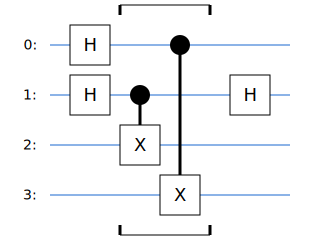

In [ ]:
q0,q1,q2,q3=cirq.LineQubit.range(4)

ops=[cirq.H(q0),cirq.H(q1),cirq.CNOT(q1,q2),cirq.CNOT(q0,q3),cirq.H(q1)]
qc=cirq.Circuit(ops)
print(qc)
SVGCircuit(qc)

Exercise 2: Create a circuit to left rotate 5 qubits

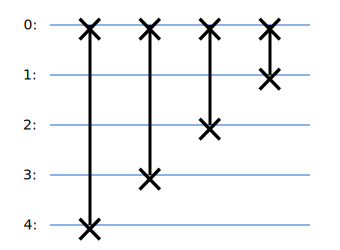

In [ ]:
qubits2=cirq.LineQubit.range(5)
op2=[cirq.SWAP(qubits2[0],qubits2[4]),cirq.SWAP(qubits2[0],qubits2[3]),cirq.SWAP(qubits2[0],qubits2[2]),cirq.SWAP(qubits2[0],qubits2[1])]
qc2=cirq.Circuit(op2)
SVGCircuit(qc2)

Exercise 3: Create the following circuit

a: ───@───H───────────H───H───

      │

b: ───@───────H───@───H───────

                  │
c: ───H───────────@───────────

0: ───@───H───────────H───H───
      │
1: ───@───────H───@───H───────
                  │
2: ───H───────────@───────────


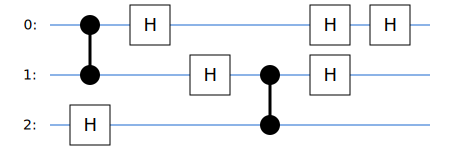

In [ ]:
a,b,c=cirq.LineQubit.range(3)
qc3=cirq.Circuit()
qc3.append([cirq.CZ(a,b),cirq.H(c)])
qc3.append([cirq.H(a)],strategy=cirq.InsertStrategy.NEW_THEN_INLINE)
qc3.append([cirq.H(b)],strategy=cirq.InsertStrategy.NEW_THEN_INLINE)
qc3.append([cirq.CZ(b,c)],strategy=cirq.InsertStrategy.NEW_THEN_INLINE)
qc3.append([cirq.H(a),cirq.H(b)],strategy=cirq.InsertStrategy.NEW_THEN_INLINE)
qc3.append([cirq.H(a)],strategy=cirq.InsertStrategy.NEW_THEN_INLINE)
print(qc3)
SVGCircuit(qc3)

Exercise 4: 2 bits Deustch-Joza Algorithm

In [ ]:
#Given oracle
"""Operations to query all possible functions on two bits.
Two of these functions are constant, and six of these functions are balanced.
"""
# Define three qubits to use.
q0, q1, q2 = cirq.LineQubit.range(3)

# Define the operations to query each of the two constant functions.
constant = ([], [cirq.X(q2)])

# Define the operations to query each of the six balanced functions.
balanced = (
    [cirq.CNOT(q0, q2)],
    [cirq.CNOT(q1, q2)],
    [cirq.CNOT(q0, q2), cirq.CNOT(q1, q2)],
    [cirq.CNOT(q0, q2), cirq.X(q2)],
    [cirq.CNOT(q1, q2), cirq.X(q2)],
    [cirq.CNOT(q0, q2), cirq.CNOT(q1, q2), cirq.X(q2)],
)

def your_circuit(oracle):
  yield cirq.X(q2),cirq.H(q0),cirq.H(q1),cirq.H(q2)
  yield oracle
  yield cirq.H(q0),cirq.H(q1)
  yield cirq.measure(q0,q1)

"""Check your answer by running this cell."""
simulator = cirq.Simulator()

print("\nYour result on constant functions:")
for oracle in constant:
    result = simulator.run(cirq.Circuit(your_circuit(oracle)), repetitions=10)
    print(result)

print("\nYour result on balanced functions:")
for oracle in balanced:
    result = simulator.run(cirq.Circuit(your_circuit(oracle)), repetitions=10)
    print(result)


Your result on constant functions:
q(0),q(1)=0000000000, 0000000000
q(0),q(1)=0000000000, 0000000000

Your result on balanced functions:
q(0),q(1)=1111111111, 0000000000
q(0),q(1)=0000000000, 1111111111
q(0),q(1)=1111111111, 1111111111
q(0),q(1)=1111111111, 0000000000
q(0),q(1)=0000000000, 1111111111
q(0),q(1)=1111111111, 1111111111


Exercise 5: create a two-qubit controlled cirq.Rx gate

In [ ]:
class CRx(cirq.Gate):
  def __init__(self,theta):
    self.theta=theta

  def _num_qubits_(self) -> int:
    return 2

  def _unitary_(self):
    return np.array([[1,0,0,0],[0,1,0,0],[0,0,np.cos(self.theta/2),-np.sin(self.theta/2)*1j],[0,0,-np.sin(self.theta/2)*1j,np.cos(self.theta/2)]])

print(np.around(cirq.unitary(CRx(0.5 * np.pi)), 3))

[[ 1.   +0.j     0.   +0.j     0.   +0.j     0.   +0.j   ]
 [ 0.   +0.j     1.   +0.j     0.   +0.j     0.   +0.j   ]
 [ 0.   +0.j     0.   +0.j     0.707+0.j    -0.   -0.707j]
 [ 0.   +0.j     0.   +0.j    -0.   -0.707j  0.707+0.j   ]]


Exercise 6:
Rotate a qubit.

Let's do the equivalent of a Rabi-flop experiment. That is, let's apply a XPowGate rotating about the x-axis for a linearly spaced set of values followed by a computational basis measurement. The end result should be a plot of the sampled fraction that were $|1\rangle$ as a function of gates of $X^t$ for $t$ between 0 and 1 for 100 values of $t$ and each result sampled 100 times.

<Axes: xlabel='t'>

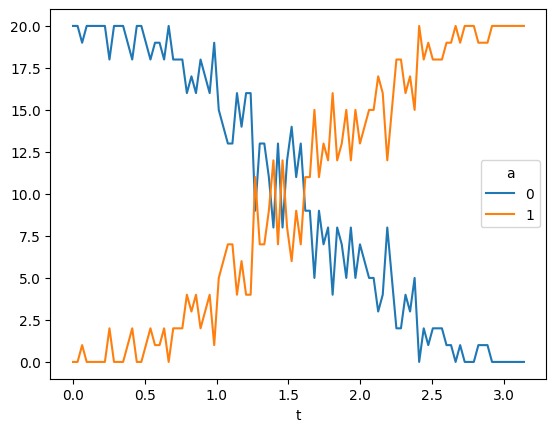

In [ ]:
import sympy as sp
import pandas as pd
a=cirq.NamedQubit('a')
t=sp.Symbol('t')
qc=cirq.Circuit(cirq.Rx(rads=t)(a),cirq.measure(a))

param_resolvers = cirq.Linspace(start=0, stop=np.pi, length=100, key='t')
results = cirq.Simulator().sample(
    program=qc, params=param_resolvers, repetitions=20
)
pd.crosstab(results.t, results.a).plot()